I dati utilizzati in questo notebook sono stati presi dalla competizione di Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

### Riferimenti bibliografici:

* Hastie, T.; Tibshirani, R. & Friedman, J. (2009), [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/).

# Alberi di decisione

## Indice

1. [Titanic: Machine Learning from Disaster](#titanic)<br>
    1.1 [Descrizione](#descrizione)<br>
    1.2 [Leggere i dati e dividere le variabili esplicative dalla variabile risposta](#leggere_dati)<br>
2. [Analisi esplorativa](#analisi_esplorativa)<br>
    2.1 [Studiare le variabili esplicative](#esplicative)<br>
    2.2 [Studiare la relazione tra variabili esplicative e variabile risposta](#esplicative_risposta)<br>
3. [Alberi di decisione](#alberi)<br>
    3.1 [Misure di impurità](#impurità)<br>
    3.2 [Creare una o più baseline](#baseline)<br>
4. [Scegliere gli iperparametri ottimali](#iperparametri)<br>
    4.1 [Definire la griglia di ricerca (*grid search*)](#grid)<br>
    4.2 [Calcolare l'accuratezza del modello per ogni combinazione degli iperparametri](#risultati)<br>
    4.3 [Visualizzare i risultati della ricerca](#visualizzare_risultati)<br>
    4.4 [Confrontare l'accuratezza del modello prima e dopo la scelta degli iperparametri ottimali](#confrontare)<br>
5. [Visualizzare le caratteristiche dell'albero](#visualizzare)<br>
    5.1 [Visualizzare l'albero](#visualizzare_albero)<br>
    5.2 [Visualizzare l'importanza delle variabili](#visualizzare_importanza)<br>
    5.3 [Visualizzare le superfici di decisione](#visualizzare_superfici)<br>

In [1]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

# 1. [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) <a id=titanic> </a>

## 1.1 Descrizione <a id=descrizione> </a>

### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, you must predict a 0 or 1 value for the variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

### Variable descriptions
* PassengerId: passenger identifier
* Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Survived: (0 = No; 1 = Yes)
* Name: name
* Sex: sex
* Age: age
* SibSp: Number of Siblings/Spouses Aboard
* Parch: Number of Parents/Children Aboard
* Ticket: Ticket Number
* Fare: Passenger Fare (British pound)
* Cabin: Cabin number
* Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## 1.2 Leggere i dati e dividere le variabili esplicative dalla variabile risposta <a id=leggere_dati> </a>

### Leggere i dati

In [1]:
PATH = "msbd/datasets/titanic"

dati = pd.read_csv(PATH + "/reso_commerciale.csv")
print("Dimensione del dataset: {} x {}".format(*dati.shape))
dati.head()

NameError: name 'pd' is not defined

### Dividere le variabili esplicative dalla variabile risposta

In [3]:
risposta =  "Survived"

X, y = dati.drop(columns=risposta).copy(), dati[risposta].copy()

# Ricordiamoci che l'assegnazione di un oggetto in python con l'operatore '=' non copia solamente il valore, 
# ma anche il riferimento all'oggetto originale.
# Si provi ad esempio, ad inizializzare y con y = dati[risposta]
# si modifichi y (es. y[0:10] = 0)
# si stampi il contenuto di y e di dati[risposta][0:10]

# 2. Analisi esplorativa <a id=analisi_esplorativa> </a>

## 2.1 Studiare le variabili esplicative <a id=esplicative> </a>

In [4]:
# TODO: vedi esercizio seguente

## 2.2 Studiare la relazione tra variabili esplicative e variabile risposta <a id=esplicative_risposta> </a>

### Dividiere i dati in training e validation

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
import seaborn as sns
import warnings

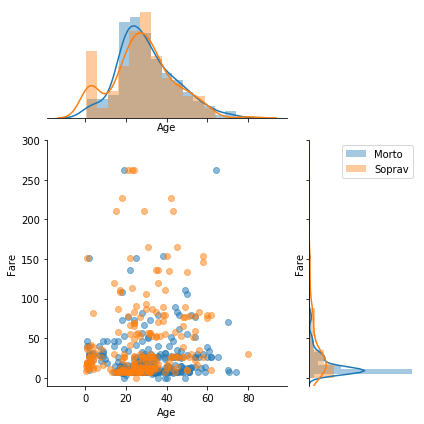

In [7]:
warnings.simplefilter(action='ignore', category=FutureWarning)

dati_grafico = X_train[["Age", "Fare"]].copy()
dati_grafico['Survived'] = y_train.values
dati_grafico.dropna(inplace=True)

g = sns.JointGrid("Age", "Fare", dati_grafico, ratio=2, height=6, space=0.2, ylim=[-10, 300])

for i, gr in dati_grafico.groupby("Survived"):
    sns.distplot(gr["Age"], ax=g.ax_marg_x)
    sns.distplot(gr["Fare"], ax=g.ax_marg_y, vertical=True)
    g.ax_joint.plot(gr["Age"], gr["Fare"], 'o', alpha=0.5)
plt.legend(["Morto", "Soprav"])
plt.show()

### Esercizio

Cosa si può dedurre dal grafico precedente?

### Esercizio

1. Completare l'analisi esplorativa commentandone i risultati;
2. Creare almeno una variabile utilizzando le variabili "Name" e/o "Ticket" e/o "Cabin" sulla base dei risultati ottenuti al punto procedente.

In [8]:
# Esempio:
dati_copy = dati.copy()
dati_copy["flag_Cabin"] = 1 - pd.isna(dati["Cabin"])*1
pd.crosstab(dati_copy["Pclass"], dati_copy["flag_Cabin"])

flag_Cabin,0,1
Pclass,,
1,40,176
2,168,16
3,479,12


### Eliminare le variabili che non si intendono utilizzare

> Nota: non avendo fatto l'analisi esplorativa, eliminiamo le variabili che richiederebbero un trattamento più lungo e una comprensione maggiore del data set. La riga seguente, come parti sucessive del notebook, vanno modificate a seconda delle variabili che si intende costruire sulla base dei risultati dell'analisi esplorativa.

In [9]:
var_da_elim = ["PassengerId", "Name", "Ticket", "Cabin"]

X = X.drop(var_da_elim, axis=1)
X_train = X_train.drop(var_da_elim, axis=1)
X_val = X_val.drop(var_da_elim, axis=1)

print("Variabili rimaste: {}.".format(", ".join(X.columns.tolist())))

Variabili rimaste: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked.


# 3. Alberi di decisione <a id=alberi> </a>

## 3.1 Misure di impurità <a id=impurità> </a>

### Esercizio

Completare le funzioni `indice_gini` e `tasso_errata_classificazione` definite in `msbd/indici/indici.py`;

Si ricorda che:

$
I_G(p) = 2 p (1 - p)\\
I_{EC}(p) = 1 - \max(p, 1 - p)
$

per $p \in [0,1]$.

> Suggerimento: dati due array `a` e `b`, entrambi di dimensioni (n,), `c = np.max([a, b], axis=0)` è un vettore di dimensioni (n,) dove, $\forall i\in\{0, \dots, n - 1\},\, c[i] = max(a[i], b[i])$.

In [10]:
from msbd.indici import indice_gini
from msbd.indici import tasso_errata_classificazione

print(inspect.getsource(indice_gini))
print(inspect.getsource(tasso_errata_classificazione))

def indice_gini(p):
    """Indice di Gini

    Parameters
    ----------
    p : array, shape (n,)
        Array delle probabilità.

    Returns
    -------
    i : array, shape (n,)
        Indici di Gini degli elementi di p.
    """
    # ============== YOUR CODE HERE ==============
    i = 2 * p * (1 - p)
    # ============================================
    return i

def tasso_errata_classificazione(p):
    """Tasso di errata classificazione

    Parameters
    ----------
    p : array, shape (n,)
        Array delle probabilità.

    Returns
    -------
    i : array, shape (n,)
        Tasso di errata classificazione degli elementi di p.
    """
    # ============== YOUR CODE HERE ==============
    i = 1 - np.max([p, 1 - p], axis=0)
    # ============================================
    return i



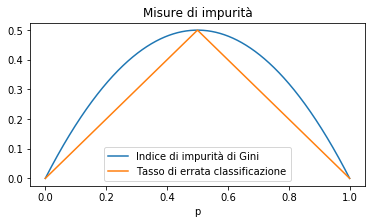

In [11]:
p = np.linspace(0, 1, 1000)

plt.figure(figsize=(6, 3))

plt.title("Misure di impurità")
plt.plot(p, indice_gini(p), label="Indice di impurità di Gini")
plt.plot(p, tasso_errata_classificazione(p), label="Tasso di errata classificazione")
plt.xlabel("p")
plt.legend()

plt.show()

### Esercizio

Dato un nodo $n_{00} = [\#\,\text{Morti}, \#\,\text{Sopravvissuti}] = [400, 400]$, calcolare l'indice di impurità di Gini e il tasso di errata classificazione per:
1. risultato della divisione $a$: $n^a_{10} = [300, 100]$ e $n^a_{11} = [100, 300]$;
2. Il risultato della divisione $b$: $n^b_{10} = [200, 400]$ e $n^b_{11} = [200, 0]$:

> Suggerimento: l'indice della divisione $a$ va calcolato come $I(a) = w^a_0 * I(n^a_{10}) + w^a_1 * I(n^a_{11})$,  dove:

> $w^a_0 = \frac{\sum n^a_{10}}{\sum n^a_{10} + \sum n^a_{11}}$ e 
> $w^a_1 = \frac{\sum n^a_{11}}{\sum n^a_{10} + \sum n^a_{11}} = 1 - w^a_0$.

Risultato atteso per lo split b:
$I_G^b = \frac{1}{3}$
$I_{EC}^b = \frac{1}{4}$


In [12]:
n00 = np.array([400, 400])

n10_a = np.array([300, 100])
n11_a = np.array([100, 300])

n10_b = np.array([200, 400])
n11_b = np.array([200, 0])

## calcolare I_G() di n00, nota: p = n00[1] / (n00[0] + n00[1])
ig_n00 = indice_gini(n00[1] / n00.sum())
# calcolare I_EC() di n00
ec_n00 = tasso_errata_classificazione(n00[1] / n00.sum())

## divisione "a"
# calcolare w0_a e w1_a
w0_a = n10_a.sum() / (n10_a.sum() + n11_a.sum())
w1_a = 1 - w0_a

# calcolare I_G() di n10_a e n11_a
ig_n10_a = indice_gini(n10_a[1] / n10_a.sum())
ig_n11_a = indice_gini(n11_a[1] / n11_a.sum())
# calcolare I_G() della divisione "a"
ig_a = w0_a * ig_n10_a + w1_a * ig_n11_a

# calcolare I_EC() di n10_a e n11_a
ec_n10_a = tasso_errata_classificazione(n10_a[1] / n10_a.sum())
ec_n11_a = tasso_errata_classificazione(n11_a[1] / n11_a.sum())
# calcolare I_EC() della divisione "a"
ec_a = w0_a * ec_n10_a + w1_a * ec_n11_a

# TODO: sostituire gli 0. con i valori corretti
# ============== YOUR CODE HERE ==============
## divisione "b"
# calcolare w0_b e w1_b
w0_b = n10_b.sum()/(n10_b.sum() + n11_b.sum())
w1_b = 1 - w0_b

# calcolare I_G() di n10_b e n11_b
ig_n10_b = indice_gini(n10_b[1]/n10_b.sum())
ig_n11_b = indice_gini(n11_b[1]/n11_b.sum())
# calcolare I_G() della divisione "b"
ig_b = w0_b * ig_n10_b + w1_b * ig_n11_b

# calcolare I_EC() di n10_b e n11_b
ec_n10_b = tasso_errata_classificazione(n10_b[1]/n10_b.sum())
ec_n11_b = tasso_errata_classificazione(n11_b[1]/n11_b.sum())
# calcolare I_EC() della divisione "b"
ec_b = w0_b * ec_n10_b + w1_b * ec_n11_b
# ============================================

print("Indice di impurità di Gini {}: {:.3f}".format(n00, ig_n00))
print("Tasso di errata classificazione {}: {:.3f}\n".format(n00, ig_n00))

print("Indice di impurità di Gini {} -> {} e {}: {:.3f}".format(n00, n10_a, n11_a, ig_a))
print("Tasso di errata classificazione {} -> {} e {}: {:.3f}\n".format(n00, n10_a, n11_a, ec_a))

print("Indice di impurità di Gini {} -> {} e {}: {:.3f}".format(n00, n10_b, n11_b, ig_b))
print("Tasso di errata classificazione {} -> {} e {}: {:.3f}\n".format(n00, n10_b, n11_b, ec_b))

Indice di impurità di Gini [400 400]: 0.500
Tasso di errata classificazione [400 400]: 0.500

Indice di impurità di Gini [400 400] -> [300 100] e [100 300]: 0.375
Tasso di errata classificazione [400 400] -> [300 100] e [100 300]: 0.250

Indice di impurità di Gini [400 400] -> [200 400] e [200   0]: 0.333
Tasso di errata classificazione [400 400] -> [200 400] e [200   0]: 0.250



### Esercizio
1. Qual'è la divisione migliore secondo l'indice di Gini?
2. Qual'è la divisione migliore secondo il tasso di errata classificazione?

## 3.2 Creare una o più baseline <a id=baseline> </a>

### `DummyClassifier`

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dc = DummyClassifier("most_frequent")

dc.fit(X_train, y_train)

y_pred = dc.predict(X_val)
dc_acc = accuracy_score(y_val, y_pred)

print('Accuratezza DummyClassifier("most_frequent"): {:.1f}%'.format(100 * dc_acc))

mc = confusion_matrix(y_val, y_pred, labels=[0,1])
print("\nMatrice di confusione DummyClassifier: \n {}".format(mc))

cr = classification_report(y_val, y_pred, output_dict=False)
print("\nReport di classificazione DummyClassifier: \n {}".format(cr))

Accuratezza DummyClassifier("most_frequent"): 60.1%

Matrice di confusione DummyClassifier: 
 [[134   0]
 [ 89   0]]

Report di classificazione DummyClassifier: 
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       134
           1       0.00      0.00      0.00        89

    accuracy                           0.60       223
   macro avg       0.30      0.50      0.38       223
weighted avg       0.36      0.60      0.45       223



C:\Users\Lorenzo\anaconda3\envs\msbd\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### `DecisionTreeClassifier` (senza ottimizzazione degli iperparametri)

In [14]:
from msbd.preprocessamento import OttenereDummy
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = Pipeline([
    ("ottenere_dummy", OttenereDummy(drop_first=True)),
    ("imputer", SimpleImputer(strategy="mean")), 
    ("tree", DecisionTreeClassifier())
])

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_val)

dtc_acc = accuracy_score(y_val, y_pred)

print('Accuratezza DummyClassifier("most_frequent"): {:.1f}%'.format(100 * dc_acc))
print("Accuratezza DecisionTreeClassifier(): {:.1f}%".format(100 * dtc_acc))

mc = confusion_matrix(y_val, y_pred, labels=[0,1])
print("\nMatrice di confusione DecisionTreeClassifier: \n {}".format(mc))

cr = classification_report(y_val, y_pred, output_dict=False)
print("\nReport di classificazione DecisionTreeClassifier: \n {}".format(cr))


Accuratezza DummyClassifier("most_frequent"): 60.1%
Accuratezza DecisionTreeClassifier(): 76.2%

Matrice di confusione DecisionTreeClassifier: 
 [[109  25]
 [ 28  61]]

Report di classificazione DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80       134
           1       0.71      0.69      0.70        89

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [42]:
print(inspect.getsource(DecisionTreeClassifier))

class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_

### Esercizio

Calcolare l'accuratezza sull'insieme di *training*. Ci sono segnali di sovradattamento?

In [32]:
dtc = Pipeline([
    ("ottenere_dummy", OttenereDummy(drop_first=True)),
    ("imputer", SimpleImputer(strategy="mean")), 
    ("tree", DecisionTreeClassifier())
])

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_train)
dtc_acc = accuracy_score(y_train, y_pred)

print('Accuratezza DummyClassifier("most_frequent"): {:.1f}%'.format(100 * dc_acc))
print("Accuratezza DecisionTreeClassifier(): {:.1f}%".format(100 * dtc_acc))

mc = confusion_matrix(y_train, y_pred, labels=[0,1])
print("\nMatrice di confusione DecisionTreeClassifier: \n {}".format(mc))

cr = classification_report(y_train, y_pred, output_dict=False)
print("\nReport di classificazione DecisionTreeClassifier: \n {}".format(cr))

Accuratezza DummyClassifier("most_frequent"): 60.1%
Accuratezza DecisionTreeClassifier(): 98.2%

Matrice di confusione DecisionTreeClassifier: 
 [[414   1]
 [ 11 242]]

Report di classificazione DecisionTreeClassifier: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       415
           1       1.00      0.96      0.98       253

    accuracy                           0.98       668
   macro avg       0.99      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



# 4. Scegliere gli iperparametri ottimali <a id=iperparametri> </a>

## 4.1 Definire la griglia di ricerca (*grid search*) <a id=grid> </a>

In [21]:
print("Profondità dell'albero allenato senza restrizioni: {}".format(dtc.named_steps["tree"].tree_.max_depth))
print("Massimo numero minimo di osservazioni in una foglia: {}".format(len(X_train) // 2))

Profondità dell'albero allenato senza restrizioni: 17
Massimo numero minimo di osservazioni in una foglia: 334


In [22]:
from sklearn.model_selection import ParameterGrid
import tqdm

In [23]:
param_grid = ParameterGrid({
    'tree__max_depth': np.arange(1, 18),
    'tree__min_samples_leaf': 2 ** np.arange(9),
})
print(param_grid.param_grid)

[{'tree__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), 'tree__min_samples_leaf': array([  1,   2,   4,   8,  16,  32,  64, 128, 256], dtype=int32)}]


> Nota: la ricerca degli iperparametri ottimali tramite *grid search* è fattibile solo quando questi sono pochi. Nel caso in cui gli iperparametri siano molti, un'approccio migliore è  la *random search*. L'equivalente di [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html) per la *random search* è [ParameterSampler](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterSampler.html).

![search](figures/search.png)

*Immagine presa da* [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf).

### Esercizio

1. Immaginare di avere risorse sufficienti per valutare fino a 9 combinazioni $(a_0,\, b_0),\,\dots,\,(a_8,\, b_8)$ di due iperparametri $a$ e $b$. Sia $n_a = n_b = n$ il numero di valori provati per ogni iperparametro. 
    1. Quando vale $n$ se si sceglie di fare una *grid search*?
    2. Quando vale $n$ se si sceglie di fare una *random search*?
2. Immaginare di voler trovare i valori ottimali per 10 iperparametri. Per ognuno di essi si vogliono provare almeno 5 possibili valori. 
    1. Qual è il numero minimo di combinazioni che si devono valutare se si sceglie di fare una *grid search*?
    2. Qual è il numero minimo di combinazioni che si devono valutare se si sceglie di fare una *random search*?
    
> Nota: per "valutare una combinazione di iperparametri" si intende:
1. Assegnare agli iperparametri in questione (es. (`max_depth`, `min_samples_leaf`)) i valori della combinazione da valutare(es. (`2`, `50`), `dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)`;
1. Stimare il modello su un insieme di *training* (`dtc.fit(X_train, y_train)`);
2. Ottenere la previsione data dal modello su un insieme di *validation* (`y_pred = dtc.predict(X_val)`);
3. Utilizzare la previsione ottenuta al passo precedente per ottenere il valore di una metrica di interesse (es. `acc = accuracy_score(y_val, y_pred)`. Il valore così ottenuto verrà utilizzato alla fine della ricerca per decidere qual è la miglior combinazione degli iperparametri tra quelle provate.

In [24]:
# si veda, ad esempio: 
# https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85

## 4.2 Calcolare l'accuratezza del modello per ogni combinazione degli iperparametri <a id=risultati> </a>

In [25]:
risultati = []

for params in tqdm.tqdm(param_grid):
    dtc.set_params(**params)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_val)
    params["accuracy_score"] = accuracy_score(y_val, y_pred)
    risultati.append(params)

risultati = pd.DataFrame(risultati).sort_values(["accuracy_score", "tree__max_depth"], ascending=[False, True])
risultati.reset_index(drop=True, inplace=True)
print("Primi 5:")
display(risultati.head())

print("Ultimi 5:")
display(risultati.tail())

100%|████████████████████████████████████████████████████████████████████████████████| 153/153 [00:03<00:00, 41.86it/s]

Primi 5:


,tree__max_depth,tree__min_samples_leaf,accuracy_score
0,8,8,0.834081
1,9,8,0.834081
2,10,8,0.834081
3,11,8,0.834081
4,12,8,0.834081


Ultimi 5:


,tree__max_depth,tree__min_samples_leaf,accuracy_score
148,13,256,0.67713
149,14,256,0.67713
150,15,256,0.67713
151,16,256,0.67713
152,17,256,0.67713


## 4.3 Visualizzare i risultati della ricerca <a id=visualizzare_risultati> </a>

In [26]:
from msbd.grafici import grafico_metrica_iperparametro

print(inspect.getsource(grafico_metrica_iperparametro))

def grafico_metrica_iperparametro(risultati, iperparam, metrica, alpha=0.75,
        s=300):
    plt.title("{} al variare di {}".format(metrica, iperparam))
    plt.scatter(risultati[iperparam], risultati[metrica], s=s, alpha=alpha)
    plt.xlabel(iperparam)
    plt.ylabel(metrica)
    plt.grid()



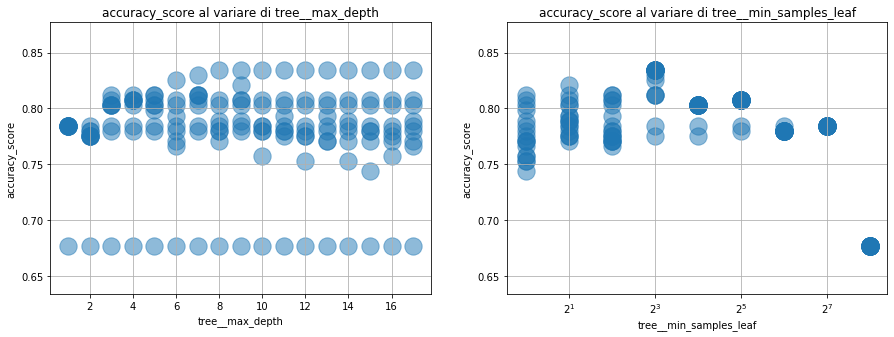

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
grafico_metrica_iperparametro(risultati, "tree__max_depth", "accuracy_score", alpha=0.5)

plt.subplot(122)
grafico_metrica_iperparametro(risultati, "tree__min_samples_leaf", "accuracy_score", alpha=0.5)
plt.xscale("log", basex=2)

plt.show()

In [28]:
from msbd.grafici import grafico_metrica_iperparametri

print(inspect.getsource(grafico_metrica_iperparametri))

def grafico_metrica_iperparametri(risultati, iperparam1, iperparam2, metrica,
        alpha=0.75, s=300):
    plt.title("{} al variare di {} e {}".format(metrica, iperparam1,
        iperparam2))
    plt.scatter(risultati[iperparam1], risultati[iperparam2],
        c=risultati[metrica], cmap=plt.cm.RdBu_r, alpha=alpha, s=s)
    plt.colorbar()
    plt.xlabel(iperparam1)
    plt.ylabel(iperparam2)
    plt.grid()



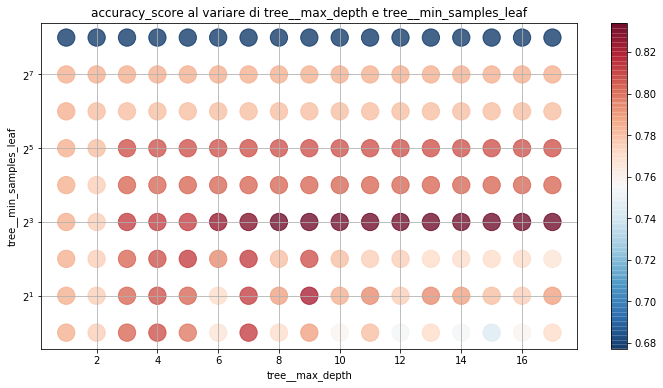

In [29]:
plt.figure(figsize=(12, 6))

grafico_metrica_iperparametri(risultati, "tree__max_depth", "tree__min_samples_leaf", "accuracy_score")
plt.yscale("log", basey=2)

plt.show()

## 4.4 Confrontare l'accuratezza del modello prima e dopo la scelta degli iperparametri ottimali <a id=confrontare> </a>

In [36]:
max_depth = risultati.loc[0, "tree__max_depth"]
min_samples_leaf = risultati.loc[0, "tree__min_samples_leaf"]

dtc_tun = Pipeline([
    ("ottenere_dummy", OttenereDummy(drop_first=True)),
    ("imputer", SimpleImputer(strategy="mean")), 
    ("tree", DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf))
])

dtc_tun.fit(X_train, y_train)

y_pred = dtc_tun.predict(X_val)
dtc_tun_acc = accuracy_score(y_val, y_pred)

print('Accuratezza DummyClassifier("most_frequent"): {:.1f}%'.format(100 * dc_acc))
print("Accuratezza DecisionTreeClassifier(): {:.1f}%".format(100 * dtc_acc))
print("Accuratezza DecisionTreeClassifier(max_depth={}, min_samples_leaf={}): {:.1f}%".format(
    max_depth, min_samples_leaf, 100 * dtc_tun_acc))

mc = confusion_matrix(y_val, y_pred, labels=[0,1])
print("\nMatrice di confusione DecisionTreeClassifier(max_depth={}, min_samples_leaf={}): \n {}".format(max_depth, min_samples_leaf, mc))

cr = classification_report(y_val, y_pred, output_dict=False)
print("\nReport di classificazione DecisionTreeClassifier(max_depth={}, min_samples_leaf={}): \n {}".format(max_depth, min_samples_leaf, cr))

Accuratezza DummyClassifier("most_frequent"): 60.1%
Accuratezza DecisionTreeClassifier(): 76.2%
Accuratezza DecisionTreeClassifier(max_depth=8, min_samples_leaf=8): 83.4%

Matrice di confusione DecisionTreeClassifier(max_depth=8, min_samples_leaf=8): 
 [[119  15]
 [ 22  67]]

Report di classificazione DecisionTreeClassifier(max_depth=8, min_samples_leaf=8): 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       134
           1       0.82      0.75      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [45]:
max_depth = risultati.loc[0, "tree__max_depth"]
min_samples_leaf = risultati.loc[0, "tree__min_samples_leaf"]

dtc_tun = Pipeline([
    ("ottenere_dummy", OttenereDummy(drop_first=True)),
    ("imputer", SimpleImputer(strategy="mean")), 
    ("tree", DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=min_samples_leaf))
])

dtc_tun.fit(X_train, y_train)

y_pred = dtc_tun.predict(X_train)
dtc_tun_acc = accuracy_score(y_train, y_pred)

print('Accuratezza DummyClassifier("most_frequent"): {:.1f}%'.format(100 * dc_acc))
print("Accuratezza DecisionTreeClassifier(): {:.1f}%".format(100 * dtc_acc))
print("Accuratezza DecisionTreeClassifier(max_depth={}, min_samples_leaf={}): {:.1f}%".format(
    max_depth, min_samples_leaf, 100 * dtc_tun_acc))

mc = confusion_matrix(y_train, y_pred, labels=[0,1])
print("\nMatrice di confusione DecisionTreeClassifier(max_depth={}, min_samples_leaf={}): \n {}".format(max_depth, min_samples_leaf, mc))

cr = classification_report(y_train, y_pred, output_dict=False)
print("\nReport di classificazione DecisionTreeClassifier(max_depth={}, min_samples_leaf={}): \n {}".format(max_depth, min_samples_leaf, cr))

Accuratezza DummyClassifier("most_frequent"): 60.1%
Accuratezza DecisionTreeClassifier(): 76.2%
Accuratezza DecisionTreeClassifier(max_depth=8, min_samples_leaf=8): 87.0%

Matrice di confusione DecisionTreeClassifier(max_depth=8, min_samples_leaf=8): 
 [[388  27]
 [ 60 193]]

Report di classificazione DecisionTreeClassifier(max_depth=8, min_samples_leaf=8): 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       415
           1       0.88      0.76      0.82       253

    accuracy                           0.87       668
   macro avg       0.87      0.85      0.86       668
weighted avg       0.87      0.87      0.87       668



# 5. Visualizzare le caratteristiche dell'albero <a id=visualizzare> </a>

## 5.1 Visualizzare l'albero <a id=visualizzare_albero> </a>

In [37]:
from sklearn.tree import export_graphviz
import graphviz

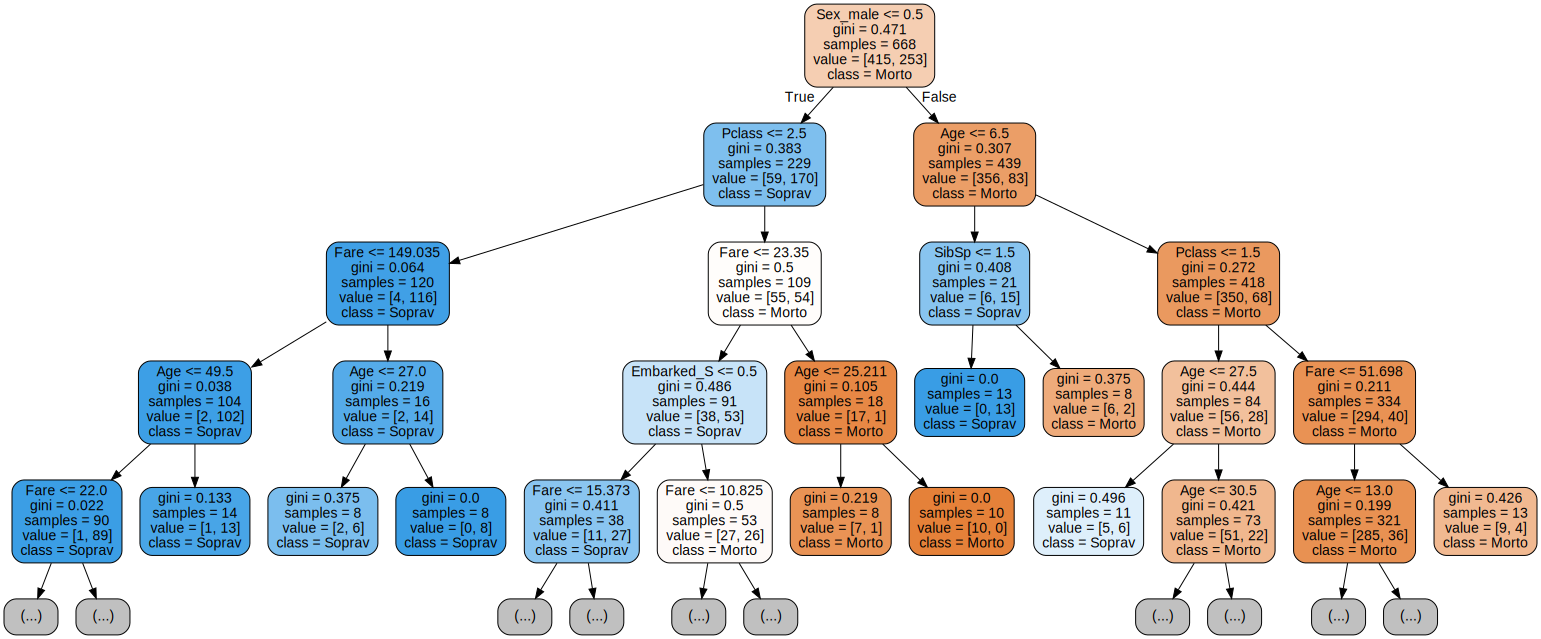

In [38]:
dot_data = export_graphviz(
    decision_tree=dtc_tun.named_steps["tree"], 
    max_depth=4,
    feature_names=dtc.named_steps["ottenere_dummy"].columns_,
    class_names=("Morto", "Soprav"),
    filled=True,
    rounded=True,
)
display(graphviz.Source(dot_data))

## 5.2 Visualizzare l'importanza delle variabili <a id=visualizzare_importanza> </a>

Dalla pagina di [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_):

The importance of a feature is computed as the *(normalized) total reduction of the criterion* brought by that feature. It is also known as the Gini importance.

In [39]:
from msbd.grafici import grafico_importanza_variabili

print(inspect.getsource(grafico_importanza_variabili))

def grafico_importanza_variabili(importanze, variabili, max_num=None,
        titolo="Importanza delle variabili"):
    importanze = pd.Series(importanze, index=variabili).sort_values(
        ascending=False)
    importanze[:max_num].plot(kind="bar", grid=True, title=titolo,
        color="tab:blue")



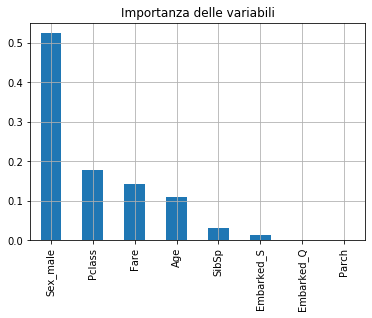

In [40]:
importanze = dtc_tun.named_steps["tree"].feature_importances_
variabili = dtc_tun.named_steps["ottenere_dummy"].columns_

grafico_importanza_variabili(importanze, variabili)

plt.show()

## 5.3 Visualizzare le superfici di decisione <a id=visualizzare_superfici> </a>

### Esercizio

Imitare, per le variabili per cui ha senso, i grafici presenti in [Plot the decision surface of a decision tree on the iris dataset](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html).

Automatically created module for IPython interactive environment


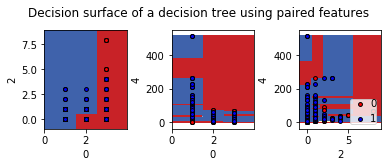

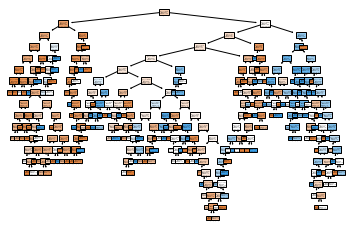

In [41]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 2 # 0=non sopravvissuti, 1=sopravvissuti
plot_colors = "rb"
plot_step = 0.02

# Preparo il dataset X_train applicandogli la Pipeline di preprocessing 
# (creazione dummy e imputazione per i valori mancanti)
preproc = Pipeline([
    ("ottenere_dummy", OttenereDummy(drop_first=True)),
    ("imputer", SimpleImputer(strategy="mean"))
])
prep_X = preproc.fit_transform(X_train)

# scelgo 3 variabili numeriche del dataset 
    # 0: Pclass
    # 1: Age
    # 2: Sibsp
    # 3: Parch
    # 4: Fare
    # 5: Sex (0=Male, 1=Female)
    # 6/7: Embarked (0,0=C, 0,1=S, 1,0=Q) 
# e ne elenco le coppie all'interno di enumerate.
# Io ho scelto Pclass, Sibsp e Fare, ma potete provare diverse combinazioni.

for pairidx, pair in enumerate([[0, 2], [0, 4], [2, 4]]):
    # Seleziono da X solo la i-esima coppia di variabili che mi interessano
    X = prep_X[:, pair]
    y = y_train

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Nomi dele variabili - in questo caso ho solo l'indice numerico
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=np.unique(y)[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()